In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [2]:
DATA_PATH = "../../data/"

data = pd.read_excel("../../df_filter_dummy_pohang.xlsx")

In [3]:
print(data.columns)
data.head(1)

Index(['Unnamed: 0', '뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2',
       '통합 분류3', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관',
       '키워드', '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', 'city',
       'filter_keyword', 'related_city', '인구', '도시', '도심', '지역', '지자체', ' 마을',
       '쇠퇴', '감소', '활성화', '도시발전', '지역발전', '혁신', '지역통합', '지역경제', '산업', '농업',
       '공업', '제조업', '서비스업', '경제활동', '사업체', '지역기업', '실업', '재정자립도', '지방세', '사업',
       '유치', '지역사회', '주민', '주민들', '지역주민', '주민생활', '지역복지', '지역대학', '관광', '지역문화',
       '지역축제', '국제', '개최', '체험', '고령화', '의료', '지역환경', '환경오염', '환경문제', '도시환경',
       '생활환경', '피해', '발생', '기존주택', '노후주택', '노후아파트', '빈집', '공가', ' 폐가', '공공시설',
       '생활시설', '기반시설', '인프라', '재개발', '재건축', '공동화', '조성', '건설', '공원화'],
      dtype='object')


,Unnamed: 0,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,...,공공시설,생활시설,기반시설,인프라,재개발,재건축,공동화,조성,건설,공원화
0,472528,1100901.200112,20011231,중앙일보,송봉근\n기자,[2001 사라져 버린 것들] 단성사 등 추억 속으로,지역>경남,지역>부산,지역>전북,NaN,...,0,0,0,0,0,1,0,0,0,0


In [4]:
keyword_set = data['filter_keyword']

In [5]:
key_set = []
for item in keyword_set:
    item = item.replace("{", "")
    item = item.replace("}", "")
    item = item.replace("'", "")
    splited = item.split(",")
    temp = []
    for tok in splited:
        temp.append(tok.replace(" ", ""))
    key_set.append(temp)

### Apriori algorithm

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [7]:
te = TransactionEncoder()
te_result = te.fit(key_set).transform(key_set)

In [8]:
key_df = pd.DataFrame(te_result, columns=te.columns_)

In [9]:
itemset = apriori(key_df, min_support=0.001, use_colnames=True)

In [39]:
for idx, item in enumerate(itemset.itemsets):
    if len(item) == 3:
        print(idx)
        break

501


In [61]:
itemset_2gram = itemset[:501]

In [62]:
itemset_2gram

,support,itemsets
0,0.038140,(감소)
1,0.117740,(개최)
2,0.116447,(건설)
3,0.001724,(경제활동)
4,0.003512,(고령화)
...,...,...
496,0.004742,"(활성화, 체험)"
497,0.001788,"(혁신, 피해)"
498,0.001453,"(피해, 환경오염)"
499,0.004326,"(피해, 활성화)"


In [63]:
from mlxtend.frequent_patterns import association_rules
apriori_result = association_rules(itemset_2gram, metric="lift", min_threshold=1)

In [64]:
network_data = apriori_result[['antecedents', 'consequents', 'lift']]

In [65]:
network_data

,antecedents,consequents,lift
0,(감소),(건설),1.085583
1,(건설),(감소),1.085583
2,(감소),(고령화),7.746623
3,(고령화),(감소),7.746623
4,(감소),(농업),1.724174
...,...,...,...
681,(활성화),(지자체),1.722486
682,(활성화),(체험),1.657697
683,(체험),(활성화),1.657697
684,(혁신),(활성화),2.452800


### Visualize network

In [66]:
import matplotlib.pyplot as plt
import networkx as nx

In [67]:
# import matplotlib
# import matplotlib.font_manager

# [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumSquare',
 'NanumSquare',
 'NanumSquare',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumSquareRound',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumBarunpen',
 'Nanum Pen Script',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumSquare',
 'Nanum Brush Script',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumBarunpen',
 'Nanum Brush Script',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumBarunpen',
 'NanumGothic',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquareRound']

In [76]:
network_data

,antecedents,consequents,lift
0,(감소),(건설),1.085583
1,(건설),(감소),1.085583
2,(감소),(고령화),7.746623
3,(고령화),(감소),7.746623
4,(감소),(농업),1.724174
...,...,...,...
681,(활성화),(지자체),1.722486
682,(활성화),(체험),1.657697
683,(체험),(활성화),1.657697
684,(혁신),(활성화),2.452800


In [68]:
np.mean(network_data['lift'])

2.1110674190206913

In [69]:
node_lst = []
for node in network_data['antecedents']:
    node_lst.append(', '.join(list(node)))

In [70]:
graph = nx.Graph()
#graph.add_nodes_from(node_lst)
for i in range(len(network_data)):
    a, b, c = network_data.iloc[i, :]
    a = ', '.join(list(a))
    b = ', '.join(list(b))
    if c > 1:
        graph.add_edge(a, b, weight = round(c,3))
    else:
        pass

In [71]:
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)

In [78]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['C:\\WINDOWS\\Fonts\\Nirmala.ttf',
 'C:\\WINDOWS\\Fonts\\PRISTINA.TTF',
 'C:\\WINDOWS\\Fonts\\NanumGothicExtraBold.ttf',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\Windows\\Fonts\\BOD_CB.TTF',
 'C:\\WINDOWS\\Fonts\\VLADIMIR.TTF',
 'C:\\Windows\\Fonts\\FORTE.TTF',
 'C:\\Windows\\Fonts\\LTYPEO.TTF',
 'C:\\Windows\\Fonts\\pala.ttf',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\phagspa.ttf',
 'C:\\WINDOWS\\Fonts\\HTOWERTI.TTF',
 'C:\\Users\\gyurihan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\LGSMHAL.TTF',
 'C:\\WINDOWS\\Fonts\\LBRITEDI.TTF',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\WINDOWS\\Fonts\\CALISTI.TTF',
 'C:\\WINDOWS\\Fonts\\LeelawUI.ttf',
 'C:\\Users\\gyurihan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\르노 라이프 싸이.ttf',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\NIAGSOL.TTF',
 'C:\\Windows\\Fonts\\HARNGTON.TTF',
 'C:\\WINDOWS\\Fonts\\georgiab.ttf',
 'C:\\WINDOWS\\Fonts\\holomdl2.ttf',
 'C:\\WINDOWS\\Fonts\\timesbi.

In [79]:
f = [f.name for f in fm.fontManager.ttflist]
f

['DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'cmss10',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmmi10',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'cmb10',
 'DejaVu Sans',
 'cmr10',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'Tw Cen MT',
 'Yu Gothic',
 'Bauhaus 93',
 'Gill Sans MT',
 'NanumSquare',
 'Perpetua',
 'Bodoni MT',
 'Wide Latin',
 'Palatino Linotype',
 'Arial',
 'Bookman Old Style',
 'Trebuchet MS',
 'Hyundai Sans Head KR',
 'Maiandra GD',
 'Baskerville Old Face',
 'Cambria',
 'Bookshelf Symbol 7',
 'Segoe Print',
 'Symbol',
 'HCR Batang',
 'Lucida S

In [ ]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

In [72]:
import matplotlib.font_manager as fm 
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/NanumGothic.ttf").get_name()
rc('font', family=font_name)
print(font_name)

NanumGothic


In [73]:
matplotlib.rcParams['font.family'] ='NanumGothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [157]:
labels = nx.get_edge_attributes(graph,'weight')

In [234]:
edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

In [192]:
pd.DataFrame(weights).quantile([0.1, 0.5, 0.9, 0.99, 0.999])

,0
0.100,1.086200
0.500,1.692000
0.900,2.883800
0.990,6.944800
0.999,49.411414


In [237]:
weights = list(weights)
weights[331] = 10

In [238]:
max(weights)

10

In [239]:
def weights_multiple(weights, n):
    lst = []
    for w in weights:
        lst.append(w * n)
    return lst

In [240]:
weights_m = weights_multiple(weights, 1)

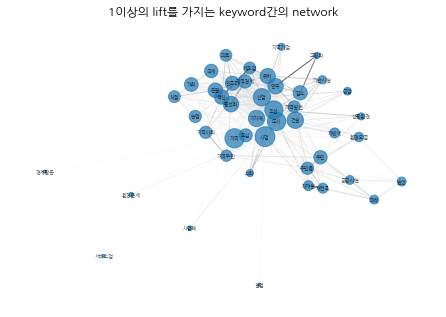

In [241]:
n_size = dict(graph.degree)
pos = nx.shell_layout(graph)

nx.draw(graph, nodelist=n_size.keys(), node_size=[v * 10 for v in n_size.values()], 
        with_labels = True, font_family = font_name, font_size = 5,
       alpha = 0.7,
       edgelist=edges, edge_color=weights_m, width=1, edge_cmap=plt.cm.binary)

plt.title("1이상의 lift를 가지는 keyword간의 network")
#plt.show(block=False)
plt.savefig("Graph.png", format="PNG", dpi = 1000)